In [36]:
import pandas as pd

In [35]:
file_path = '/Users/ericknapp/Documents/jupyter notebook/doordash_data.xlsx'

data = pd.read_excel(file_path)
df = pd.DataFrame(data)

In [37]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60583 entries, 0 to 60582
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DELIVERY_UUID                   60583 non-null  object        
 1   DELIV_CREATED_AT                60583 non-null  datetime64[ns]
 2   DELIV_STORE_NAME                60583 non-null  object        
 3   DELIV_DASHER_ID                 59574 non-null  float64       
 4   DELIV_SUBMARKET                 60583 non-null  object        
 5   DELIV_D2R                       59296 non-null  float64       
 6   DELIV_IS_20_MIN_LATE            60583 non-null  int64         
 7   DELIV_CLAT                      58190 non-null  float64       
 8   DELIV_CANCELLED_AT              669 non-null    datetime64[ns]
 9   DELIV_MISSING_INCORRECT_REPORT  60583 non-null  bool          
 10  WAS_REQUESTED                   60583 non-null  i

In [32]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       DELIV_DASHER_ID     DELIV_D2R  DELIV_IS_20_MIN_LATE    DELIV_CLAT  \
count     5.957400e+04  59296.000000          60583.000000  58190.000000   
mean      1.068842e+07      4.178952              0.047423      4.535178   
std       6.564766e+06     12.389168              0.212543      7.907620   
min       2.172560e+05      0.000000              0.000000      0.050000   
25%       5.250623e+06      0.550000              0.000000      0.283333   
50%       1.013477e+07      2.716667              0.000000      1.500000   
75%       1.665884e+07      5.566667              0.000000      5.616667   
max       2.291942e+07   1313.500000              1.000000    119.783333   

       WAS_REQUESTED   WAS_MISSING    WAS_SUBBED     WAS_FOUND    ITEM_PRICE  \
count        60583.0  60583.000000  60583.000000  60583.000000  60583.000000   
mean             1.0      0.062493      0.042718      0.932390      4.969335   
std              0.0      0.242050      0.202223      

In [38]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
                          DELIVERY_UUID    DELIV_CREATED_AT DELIV_STORE_NAME  \
0  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
1  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
2  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
3  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
4  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   

   DELIV_DASHER_ID DELIV_SUBMARKET  DELIV_D2R  DELIV_IS_20_MIN_LATE  \
0       16990594.0      Cincinnati   0.083333                     0   
1       16990594.0      Cincinnati   0.083333                     0   
2       16990594.0      Cincinnati   0.083333                     0   
3       16990594.0      Cincinnati   0.083333                     0   
4       16990594.0      Cincinnati   0.083333                     0   

   DELIV_CLAT DELIV_CANCELLED_AT  DELIV_MISSING_INCORRECT_RE

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

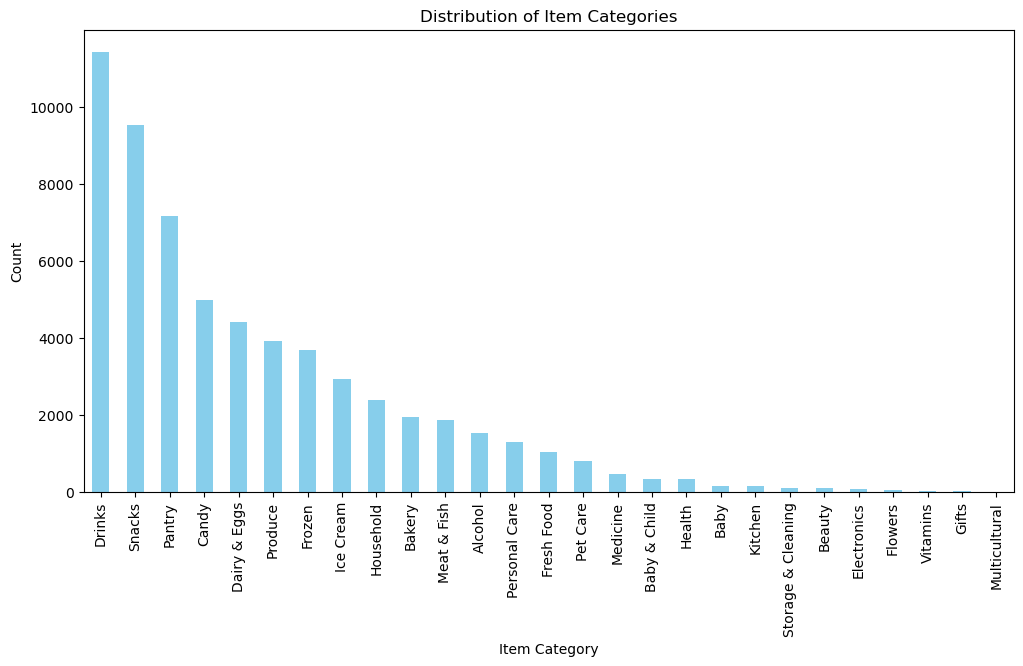

In [43]:
# Plotting using matplotlib
plt.figure(figsize=(12, 6))

# Count the occurrences of each unique value in the 'ITEM_CATEGORY' column
category_counts = df['ITEM_CATEGORY'].value_counts()

# Plotting a bar chart
category_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel("Item Category")
plt.ylabel("Count")
plt.title("Distribution of Item Categories")

# Display the plot
plt.show()

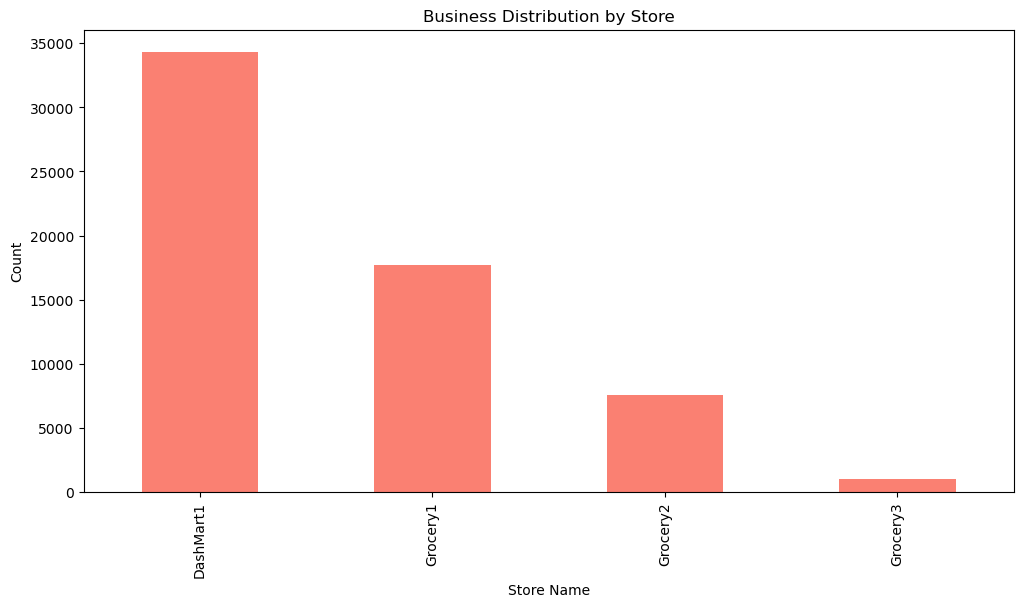

In [44]:
plt.figure(figsize=(12, 6))

# Count the occurrences of each unique value in the 'DELIV_STORE_NAME' column
store_counts = df['DELIV_STORE_NAME'].value_counts()

# Plotting a bar chart
store_counts.plot(kind='bar', color='salmon')

# Adding labels and title
plt.xlabel("Store Name")
plt.ylabel("Count")
plt.title("Business Distribution by Store")

# Display the plot
plt.show()

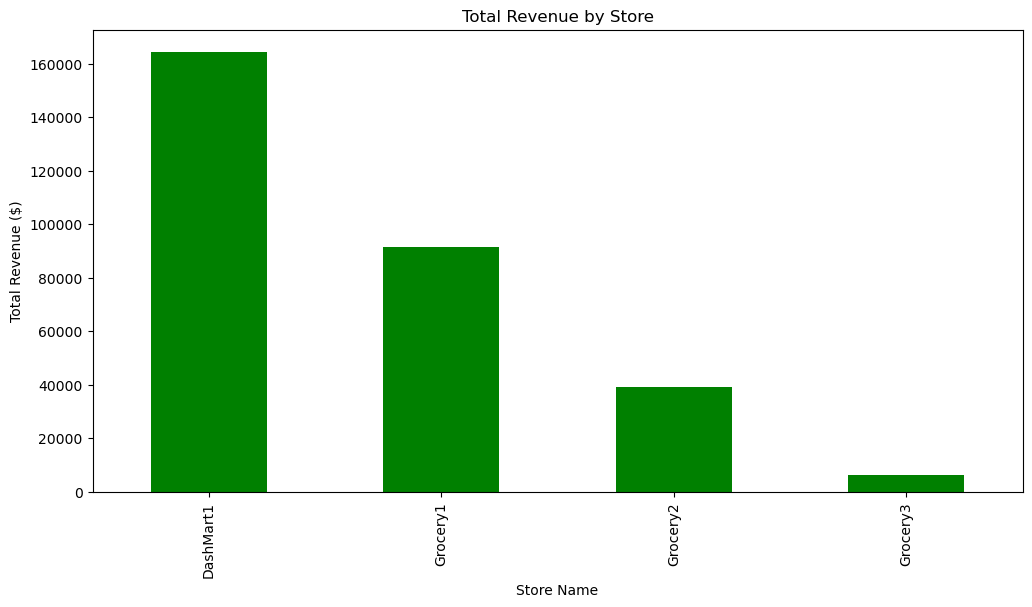

In [48]:
# Calculate total revenue for each store
store_revenue = df.groupby('DELIV_STORE_NAME')['ITEM_PRICE'].sum()

# Plotting using matplotlib
plt.figure(figsize=(12, 6))

# Plotting a bar chart
store_revenue.plot(kind='bar', color='green')

# Adding labels and title
plt.xlabel("Store Name")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenue by Store")

# Display the plot
plt.show()

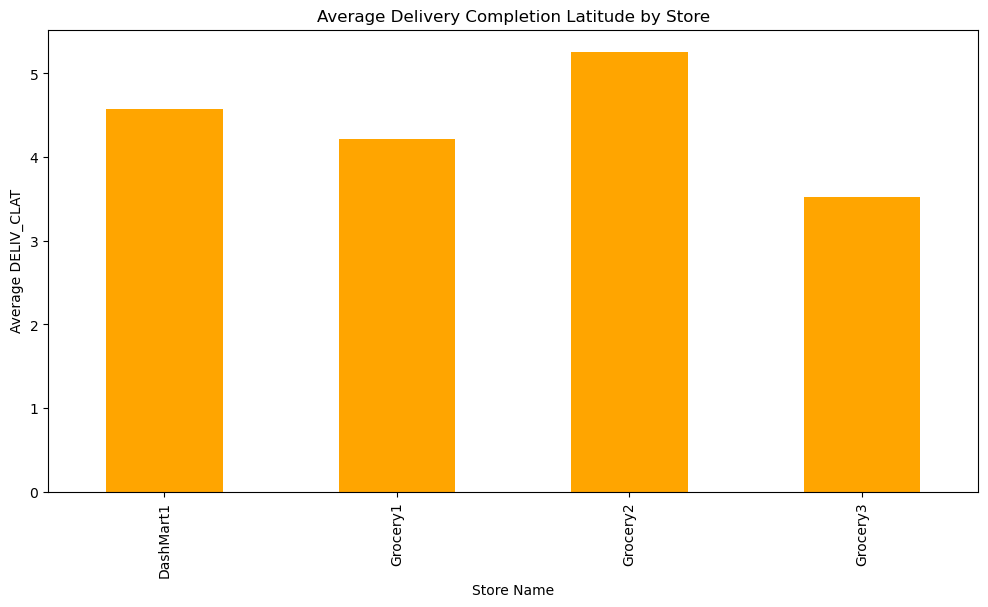

In [49]:
# Calculate average DELIV_CLAT for each store
store_avg_clat = df.groupby('DELIV_STORE_NAME')['DELIV_CLAT'].mean()

# Plotting using matplotlib
plt.figure(figsize=(12, 6))

# Plotting a bar chart
store_avg_clat.plot(kind='bar', color='orange')

# Adding labels and title
plt.xlabel("Store Name")
plt.ylabel("Average DELIV_CLAT")
plt.title("Average Delivery Completion Latitude by Store")

# Display the plot
plt.show()

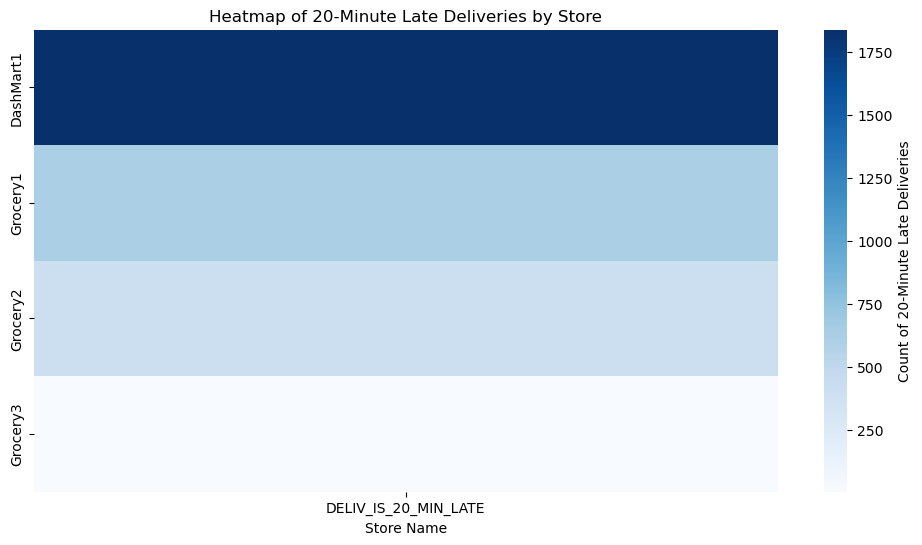

In [66]:
late_deliveries = df[df['DELIV_IS_20_MIN_LATE'] == 1]

# Count the occurrences of each unique DELIVERY_UUID in late deliveries for each store
heatmap_data = pd.pivot_table(late_deliveries, values='DELIV_IS_20_MIN_LATE', 
                              index='DELIV_STORE_NAME', aggfunc='count')

# Plotting using seaborn heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', cbar_kws={'label': 'Count of 20-Minute Late Deliveries'})
plt.title('Heatmap of 20-Minute Late Deliveries by Store')
plt.xlabel('Store Name')
plt.ylabel('')

# Display the plot
plt.show()

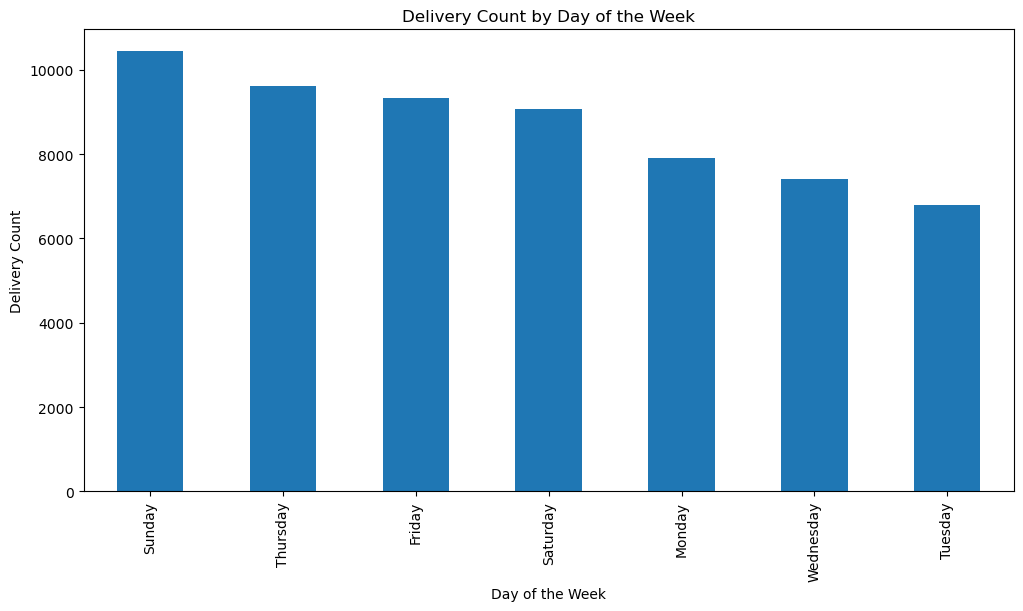

In [64]:
# Analyzing delivery patterns by day of the week
df['Day_of_Week'] = df['DELIV_CREATED_AT'].dt.day_name()

plt.figure(figsize=(12, 6))
df.groupby('Day_of_Week')['DELIVERY_UUID'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Delivery Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Count')
plt.show()

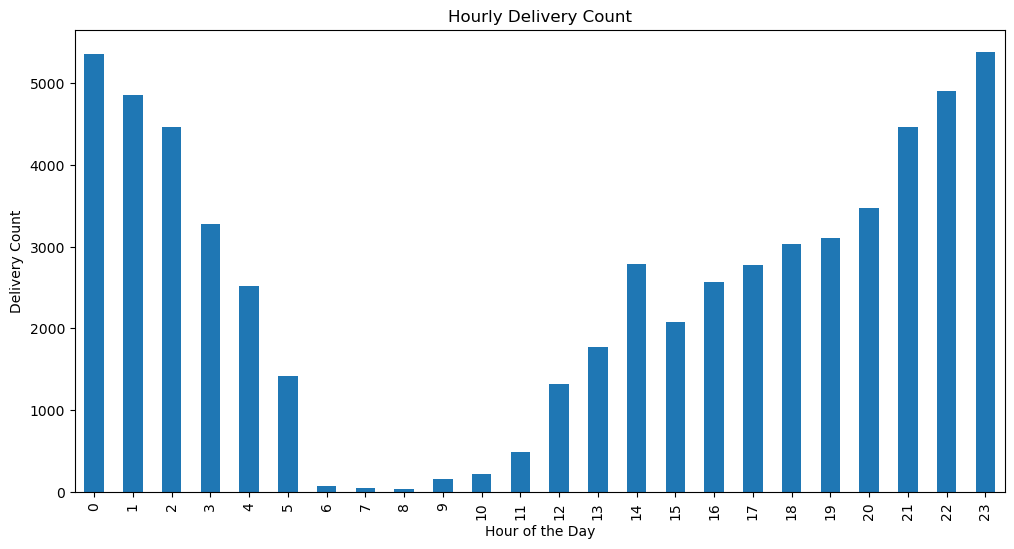

In [62]:
# Analyzing delivery patterns by hour of the day
df['Hour_of_Day'] = df['DELIV_CREATED_AT'].dt.hour

plt.figure(figsize=(12, 6))
df.groupby('Hour_of_Day')['DELIVERY_UUID'].count().plot(kind='bar')
plt.title('Hourly Delivery Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Delivery Count')
plt.show()


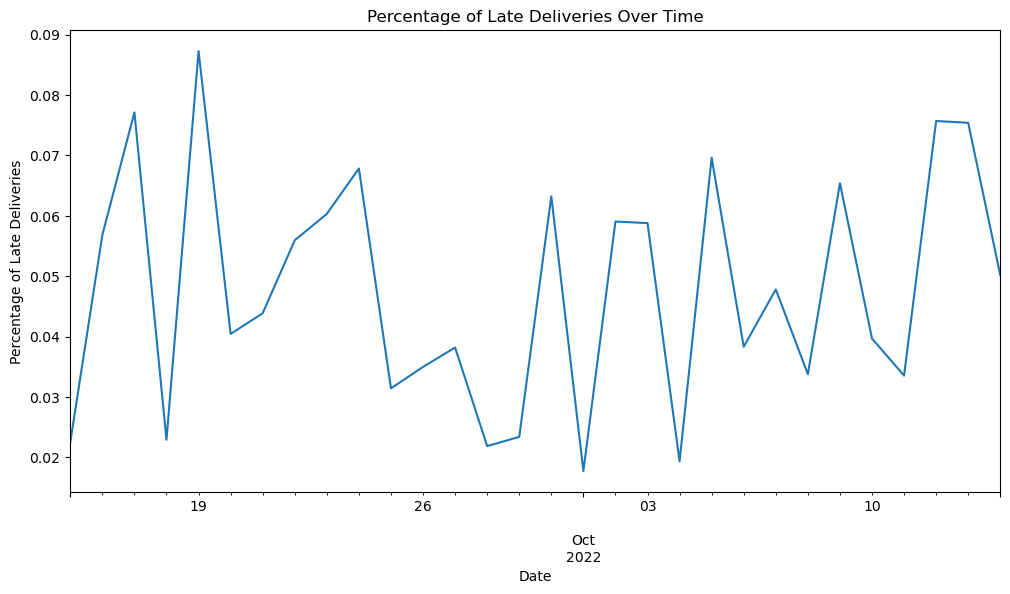

In [63]:
# Plotting the percentage of late deliveries over time
plt.figure(figsize=(12, 6))
df.resample('D', on='DELIV_CREATED_AT')['DELIV_IS_20_MIN_LATE'].mean().plot()
plt.title('Percentage of Late Deliveries Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Late Deliveries')
plt.show()


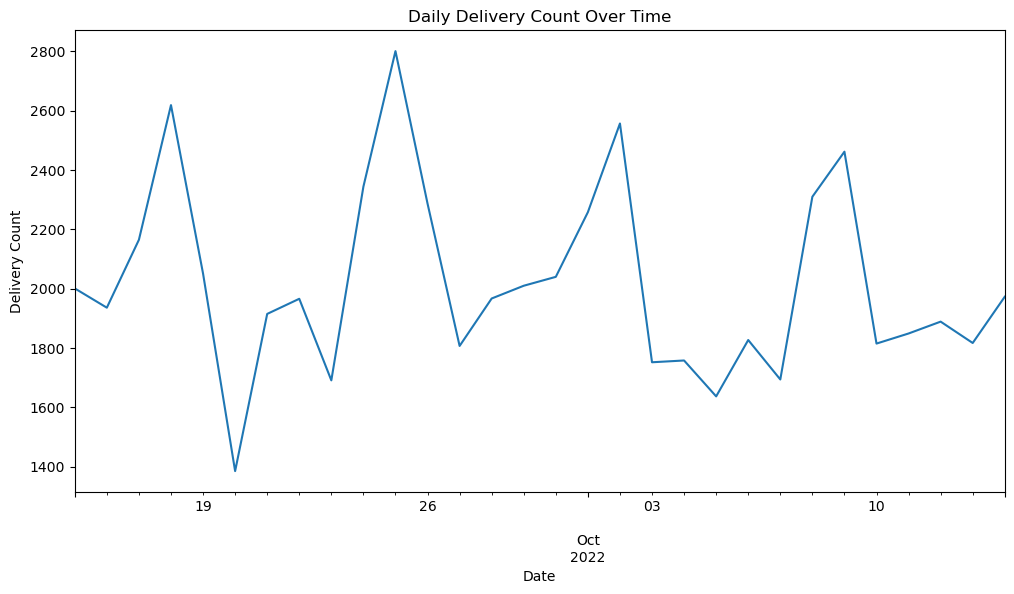

In [65]:
# Convert 'DELIV_CREATED_AT' to datetime format
df['DELIV_CREATED_AT'] = pd.to_datetime(df['DELIV_CREATED_AT'])

# Plotting delivery count over time
plt.figure(figsize=(12, 6))
df.resample('D', on='DELIV_CREATED_AT').size().plot()
plt.title('Daily Delivery Count Over Time')
plt.xlabel('Date')
plt.ylabel('Delivery Count')
plt.show()

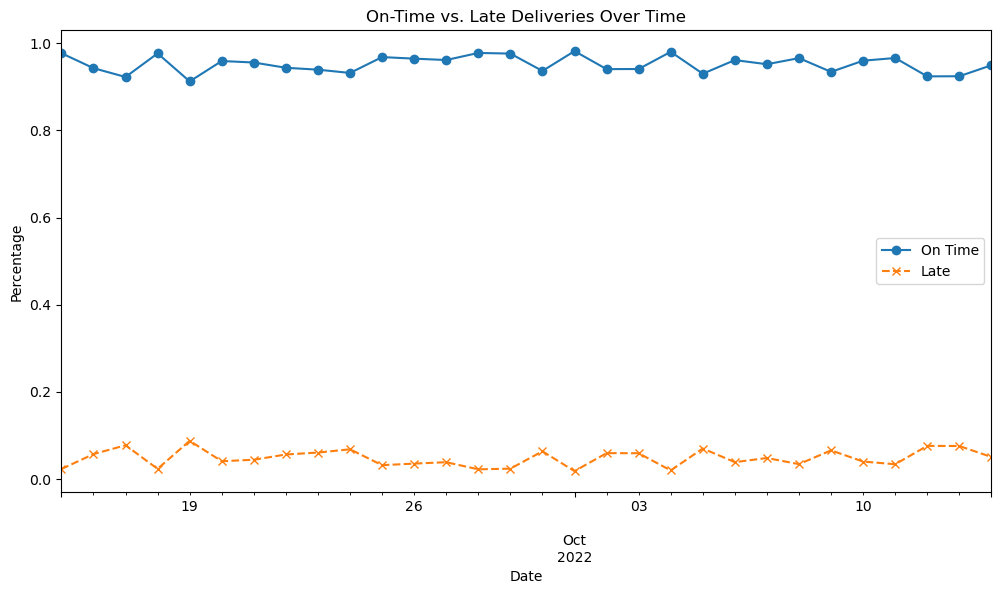

In [67]:
# Convert 'DELIV_CREATED_AT' to datetime format
df['DELIV_CREATED_AT'] = pd.to_datetime(df['DELIV_CREATED_AT'])

# Plotting on-time vs. late deliveries over time
plt.figure(figsize=(12, 6))
df['On_Time'] = ~df['DELIV_IS_20_MIN_LATE'].astype(bool)
df.resample('D', on='DELIV_CREATED_AT')['On_Time'].mean().plot(label='On Time', linestyle='-', marker='o')
df.resample('D', on='DELIV_CREATED_AT')['DELIV_IS_20_MIN_LATE'].mean().plot(label='Late', linestyle='--', marker='x')
plt.title('On-Time vs. Late Deliveries Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

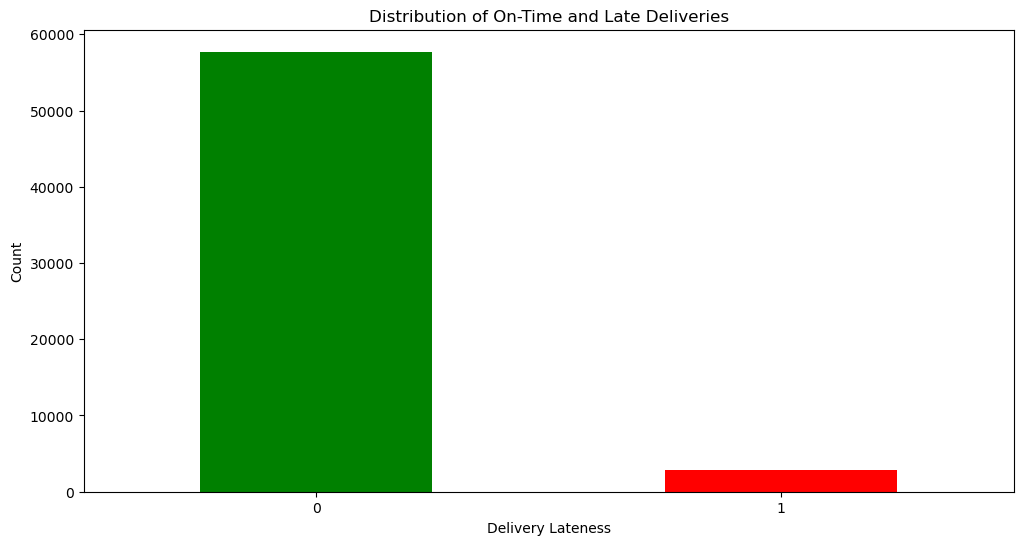

In [68]:
# Plotting a histogram of lateness distribution
plt.figure(figsize=(12, 6))
df['DELIV_IS_20_MIN_LATE'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of On-Time and Late Deliveries')
plt.xlabel('Delivery Lateness')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


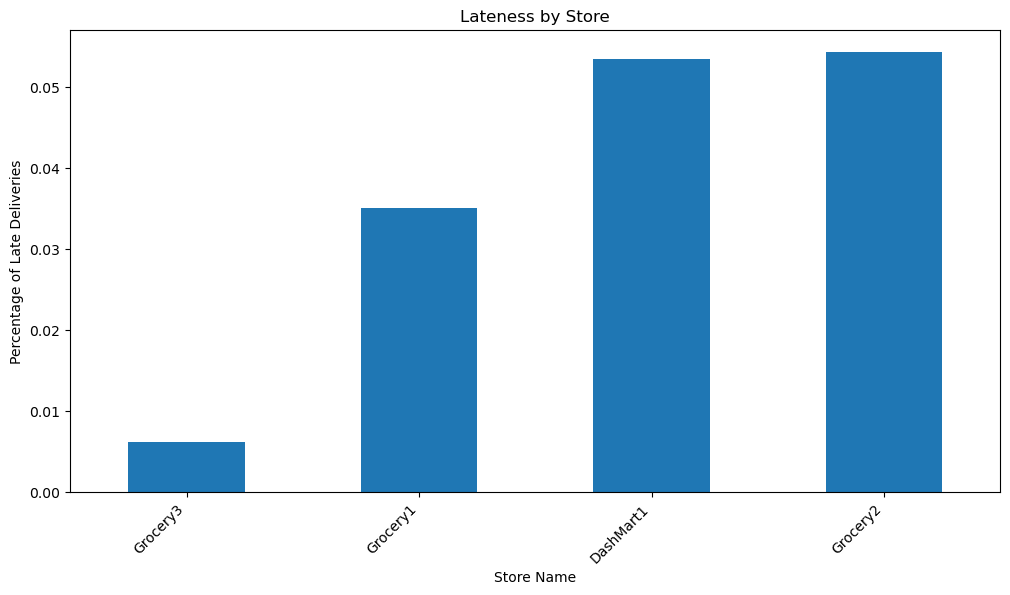

In [69]:
# Plotting lateness by store
plt.figure(figsize=(12, 6))
df.groupby('DELIV_STORE_NAME')['DELIV_IS_20_MIN_LATE'].mean().sort_values().plot(kind='bar')
plt.title('Lateness by Store')
plt.xlabel('Store Name')
plt.ylabel('Percentage of Late Deliveries')
plt.xticks(rotation=45, ha='right')
plt.show()


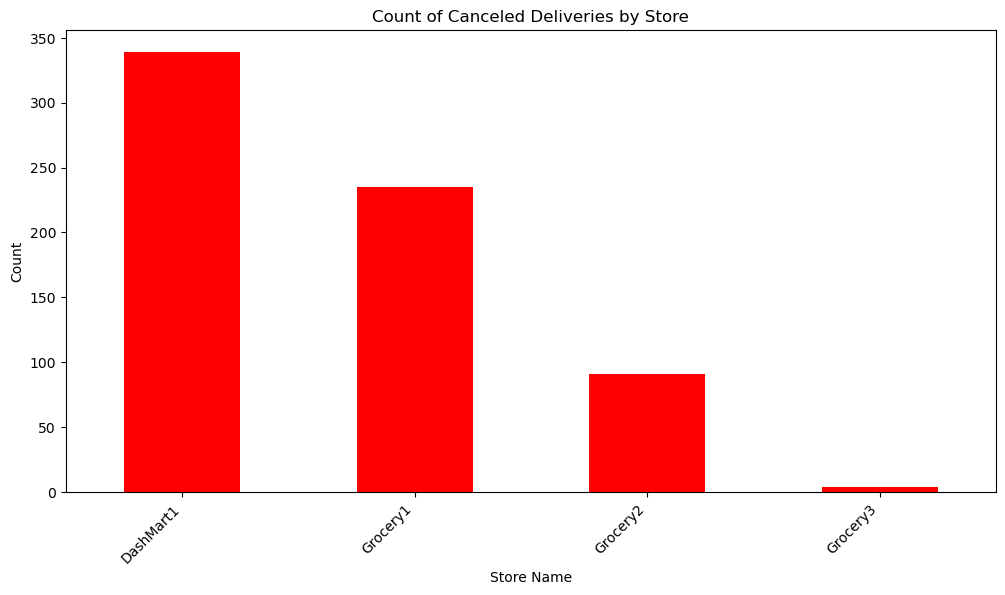

In [74]:
# Count the number of canceled deliveries
cancelled_deliveries = df[df['DELIV_CANCELLED_AT'].notnull()]

# Plotting the count of canceled deliveries by store
plt.figure(figsize=(12, 6))
cancelled_deliveries['DELIV_STORE_NAME'].value_counts().plot(kind='bar', color='red')
plt.title('Count of Canceled Deliveries by Store')
plt.xlabel('Store Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [76]:
# Count the number of deliveries with missing or incorrect reports
missing_reports = df[df['DELIV_MISSING_INCORRECT_REPORT']]

# Calculate the percentage of deliveries with missing or incorrect reports
percentage_missing_reports = (len(missing_reports) / len(df)) * 100

print(f"Percentage of Deliveries with Missing or Incorrect Reports: {percentage_missing_reports:.2f}%")


Percentage of Deliveries with Missing or Incorrect Reports: 2.53%
